<h1 align="center" style="margin-top:0">Electric Vehicle Adoption & Trends</h1>

<p align="center">
  <img src="ev_overview.png" alt="Electric Vehicle Global Overview" width="640">
</p>

<p align="center"><em>Supporting material: Global & European EV analysis (2010–2024)</em></p>

<p align="center">
  <strong> David Hernández & Miguel Florindo
</p>

<p align="center">
  <strong> November 2025
</p>

<hr style="margin:18px 0">

#### Electric-Vehicle-Adaptation - Trends-Growth-Infrastructure (Europe)

🚗⚡ Electric Vehicle Adoption & Trends (2010–2024)

This project analyzes European electric vehicle (EV) trends using data from 2010 to 2024.  
Last dataset update: **May 2025** (International Energy Agency – IEA).

The goal is to understand EV adoption growth, charging infrastructure expansion, and the environmental impact of the transition from combustion vehicles to electric mobility.  
The analysis combines **SQL for data transformation** and **Python for visualization**, producing actionable insights supported by clean and reproducible code.



📌 **Objectives & Scope**

This assessment answers the following key questions:

**1) EV Adoption per Region — Brief Global View**  
*How has EV adoption evolved across major world regions from 2010 to 2024? Which regions show the strongest growth?*

**2) Europe: EV Growth vs Charging Infrastructure**  
*Which European countries lead in EV acquisition vs charging point installation (Top 10 of each)?*

**3) Europe: Highest Increase in EV Sales**  
*Which country recorded the largest increase in EV units over the observed period?*

**4) Environmental Impact of EV Adoption**

4.1) **How many gasoline cars could have been fueled with the petroleum avoided due to EV adoption?**  
4.2) **How many households could have been powered using the electricity (GWh) consumed by EVs?**

Analysis is based on publicly available datasets from the **International Energy Agency**, collected and curated for the *Global EV Outlook 2025*.

🔗 Dataset source:  [International Energy Agency - Global EV Outlook 2025](https://www.iea.org/data-and-statistics/data-product/global-ev-outlook-2025#global-ev-data)

🔗 Link to presentation:
[EV Adoption Analysis – Google Slides](https://docs.google.com/presentation/d/1GIC0BJaIoc_AXqlStqhFku6Woq6qih4PLt1l7QRnlEY/edit?slide=id.g3756415262e_0_9#slide=id.g3756415262e_0_9)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # For lollypop chart

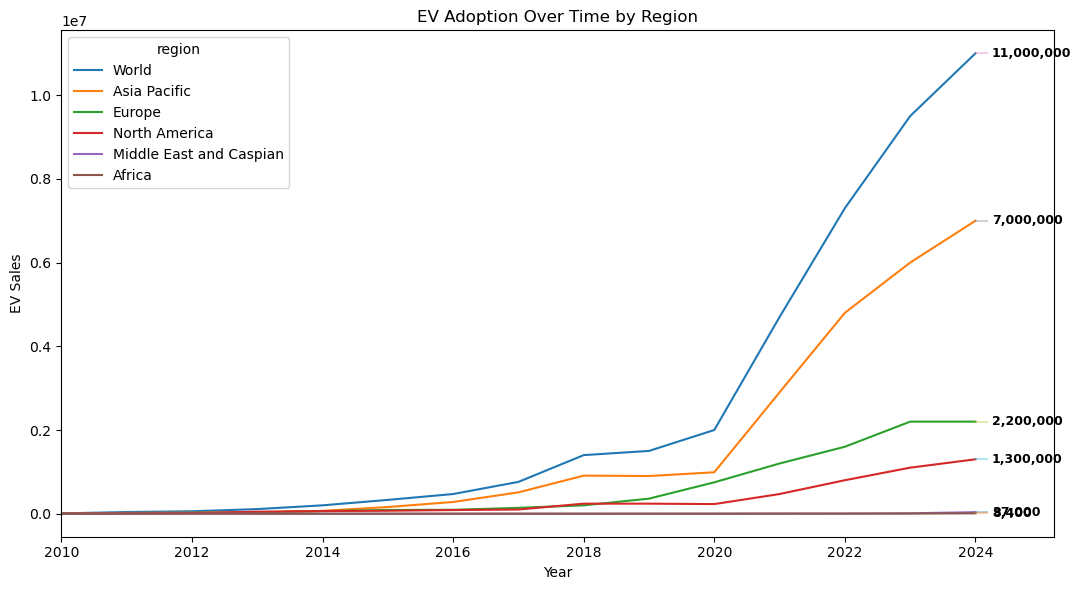

In [ ]:
## Chart for the presentation: Slide #10

# Load
df_trend = pd.read_csv("ev_trend.csv")     # region, year, ev_sales
df_growth = pd.read_csv("ev_growth.csv")

# Clean helper rows
df_trend = df_trend[df_trend["region"] != "region_country"]

# Pivot
pivot = df_trend.pivot(index="year", columns="region", values="ev_sales")

#  Sort regions by latest-year value (largest first)
last_year = pivot.index.max()
order = pivot.loc[last_year].sort_values(ascending=False).index
pivot = pivot[order]

# Plot
fig, ax = plt.subplots(figsize=(11,6))
pivot.plot(ax=ax)

ax.set_title("EV Adoption Over Time by Region")
ax.set_xlabel("Year")
ax.set_ylabel("EV Sales")

#  Label only the last point of each line (bold, nudged right) ----
x_pad = 0.25  # This to show how far to the right of the last x to place labels
for region in pivot.columns:
    y_val = pivot.loc[last_year, region]
    # Drawing a horizontal leader to the label
    ax.plot([last_year, last_year + x_pad*0.7], [y_val, y_val], alpha=0.35)
    ax.annotate(
        f"{int(y_val):,}",                # 1,300,000 format
        xy=(last_year, y_val),
        xytext=(last_year + x_pad, y_val),
        va="center", ha="left",
        fontsize=9, fontweight="bold",
    )

# Keep lines fully visible after labeling right
ax.set_xlim(pivot.index.min(), last_year + 1.2)

# Order legend to match sorted lines
ax.legend(title="region", loc="upper left", frameon=True)

plt.tight_layout()
plt.savefig("ev_adoption_by_region_labeled.png", dpi=150)
plt.show()


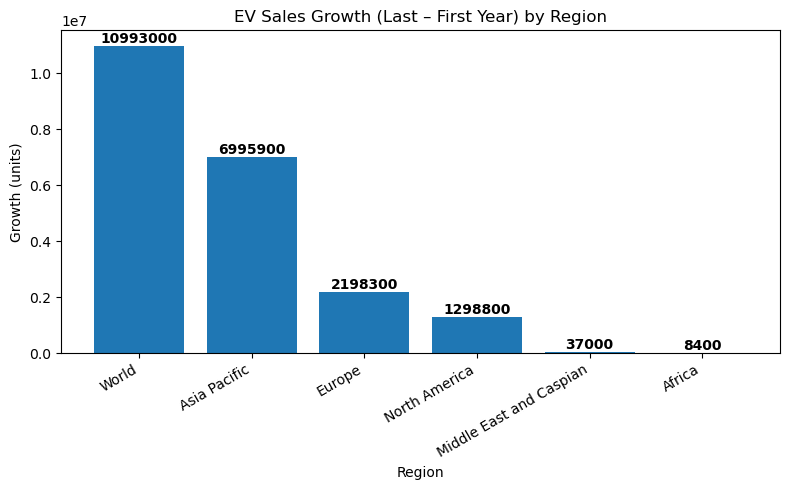

In [ ]:
## Chart for the presentation: Slide #11
df_growth_sorted = df_growth.sort_values("growth", ascending=False)

# Remove "region_country" from the data
df_growth_sorted = df_growth_sorted[df_growth_sorted["region"] != "region_country"]

plt.figure(figsize=(8,5))
bars = plt.bar(df_growth_sorted["region"], df_growth_sorted["growth"])

plt.title("EV Sales Growth (Last – First Year) by Region")
plt.xlabel("Region")
plt.ylabel("Growth (units)")

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=30, ha="right")
plt.tight_layout()

plt.savefig("ev_growth_by_region.png", dpi=150)
plt.show()


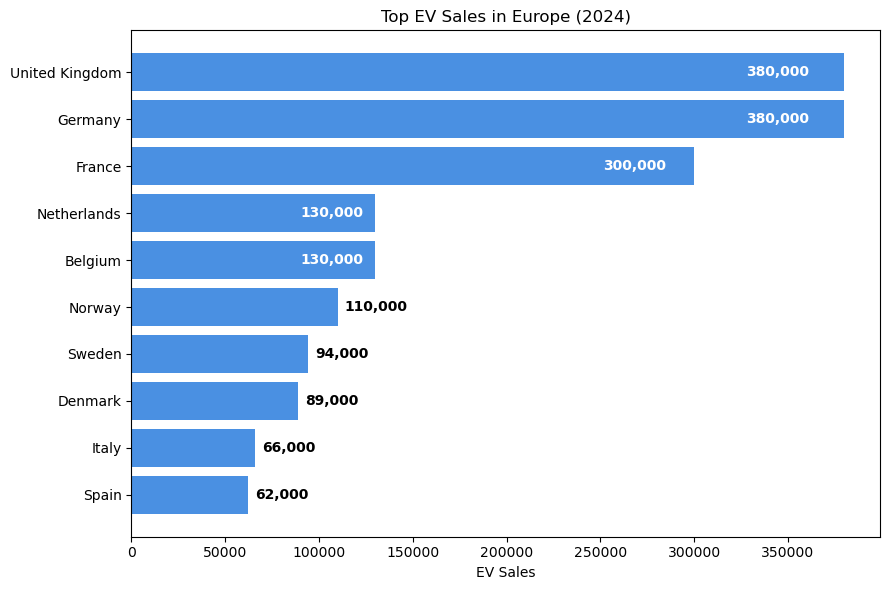

In [ ]:
## Chart for the presentation: Slide #12

# Loading the CSVs first
ev = pd.read_csv("top_eu_ev.csv") 
cp = pd.read_csv("top_eu_cp.csv")

# 1) Normalize column names
if "export_year" in ev.columns and "year" not in ev.columns:
    ev = ev.rename(columns={"export_year": "year"})
if "export_year" in cp.columns and "year" not in cp.columns:
    cp = cp.rename(columns={"export_year": "year"})

# 2) Remove unwanted fake region if present
if "region_country" in ev["country"].values:
    ev = ev[ev["country"] != "region_country"]

# 3) EV Top Countries — bar chart with labels
ev = ev.sort_values("ev_sales", ascending=True)

plt.figure(figsize=(9,6))
bars = plt.barh(ev["country"], ev["ev_sales"], color="#4A90E2")

plt.title(f"Top EV Sales in Europe ({int(ev['year'].iloc[0])})")
plt.xlabel("EV Sales")

# Add labels to bars
for bar in bars:
    width = bar.get_width()
    label = f"{width:,.0f}"  # thousands separator
    y = bar.get_y() + bar.get_height()/2

    # If bar is long, put label inside; else, put it outside
    if width > ev["ev_sales"].max() * 0.30:
        plt.text(width - (width * 0.05), y, label,
                 ha='right', va='center', fontsize=10, color="white", fontweight="bold")
    else:
        plt.text(width + ev["ev_sales"].max()*0.01, y, label,
                 ha='left', va='center', fontsize=10, fontweight="bold")

plt.tight_layout()
plt.savefig("top_ev_eu.png", dpi=150)
plt.show()


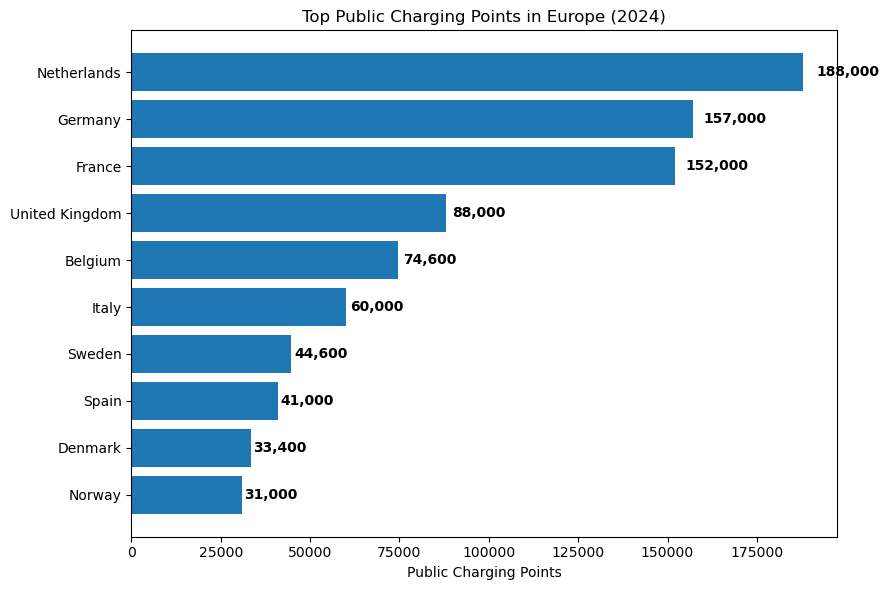

In [ ]:
## Chart for the presentation: Slide #13

cp = cp.sort_values("charging_points", ascending=True)

plt.figure(figsize=(9,6))
bars = plt.barh(cp["country"], cp["charging_points"])

plt.title(f"Top Public Charging Points in Europe ({int(cp['year'].iloc[0])})")
plt.xlabel("Public Charging Points")

# Add labels to the right of each bar
for bar, value in zip(bars, cp["charging_points"]):
    plt.text(
        bar.get_width() + (bar.get_width() * 0.02),   # a little to the right of the bar
        bar.get_y() + bar.get_height()/2,
        f"{value:,}",   # formatted with comma separators
        va="center",
        ha="left",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()
plt.savefig("top_cp_eu.png", dpi=150)
plt.show()


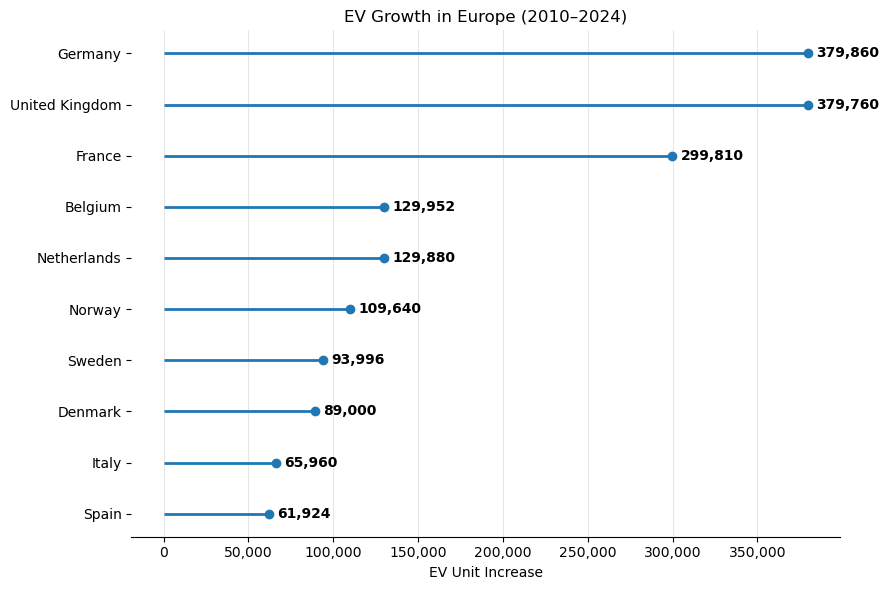

In [ ]:
## Chart for the presentation: Slide #15

# Load data
growth = pd.read_csv("top_ev_growth_europe.csv")

# Ensure numeric
growth["growth"] = pd.to_numeric(growth["growth"], errors="coerce").fillna(0).astype(int)

# Sort (small → big so labels read nicely top→bottom)
growth = growth.sort_values("growth", ascending=True).reset_index(drop=True)

# Optional: keep only top N biggest growers (uncomment if you want)
# growth = growth.tail(5)

# Positions for y axis
ypos = range(len(growth))

fig, ax = plt.subplots(figsize=(9, 6))

# Lollipop: stem + marker
ax.hlines(y=ypos, xmin=0, xmax=growth["growth"], linewidth=2)
ax.plot(growth["growth"], ypos, "o")  # end dots

# Y labels = countries
ax.set_yticks(ypos)
ax.set_yticklabels(growth["country"])

# X formatting (1,234,567)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Title/axes
ax.set_title("EV Growth in Europe (2010–2024)")
ax.set_xlabel("EV Unit Increase")

# Add value labels to the right of dots
for y, val in zip(ypos, growth["growth"]):
    ax.annotate(f"{val:,}", xy=(val, y), xytext=(6, 0),
                textcoords="offset points", va="center", ha="left", fontsize=10, fontweight="bold")

# Clean up look
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)
ax.grid(axis="x", alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig("ev_growth_eu_lollipop.png", dpi=150)
plt.show()


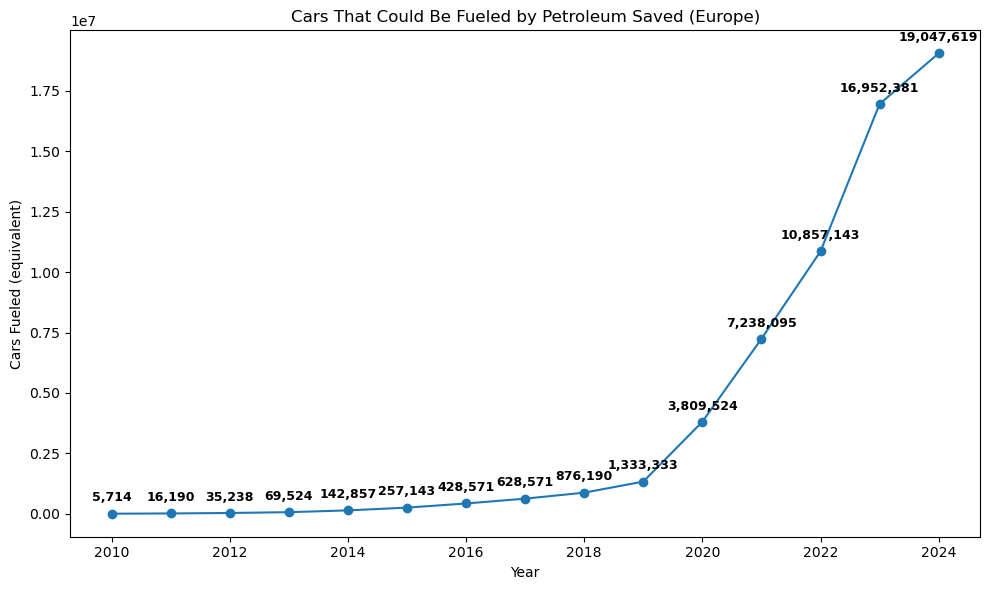

In [ ]:
## Chart for the presentation: Slide #16

eu = pd.read_csv("europe_per_year_petroleum_avoidance.csv")

plt.figure(figsize=(10,6))
plt.plot(eu["year"], eu["cars_fueled_equivalent"], marker="o")

plt.title("Cars That Could Be Fueled by Petroleum Saved (Europe)")
plt.xlabel("Year")
plt.ylabel("Cars Fueled (equivalent)")
plt.tight_layout()

# === Add labels to each point ===
for x, y in zip(eu["year"], eu["cars_fueled_equivalent"]):
    plt.text(
        x, 
        y + (max(eu["cars_fueled_equivalent"]) * 0.02),  # slight offset above the point
        f"{int(y):,}", 
        ha="center", 
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

plt.savefig("eu_cars_fueled_equivalent.png", dpi=150)
plt.show()


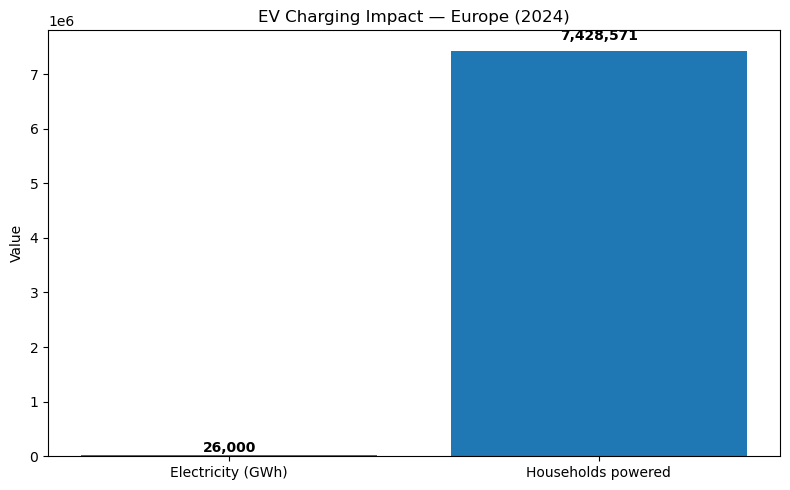

In [ ]:
## Chart for the presentation: Slide #18


# Build from SQL result
df = pd.DataFrame({
    "year": [2024, 2030],
    "electricity_demand_gwh": [26000, 82000],
    "homes_powered_equivalent": [7428571, 23428571]
})

# Helper: nice comma formatting
def fmt(n): 
    return f"{int(n):,}"

row24 = df[df["year"] == 2024].iloc[0]
x_24 = ["Electricity (GWh)", "Households powered"]
y_24 = [row24["electricity_demand_gwh"], row24["homes_powered_equivalent"]]

plt.figure(figsize=(8,5))
bars = plt.bar(x_24, y_24)
plt.title("EV Charging Impact — Europe (2024)")
plt.ylabel("Value")

# labels
for bar, val in zip(bars, y_24):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() * 1.02, 
        fmt(val),
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )

plt.tight_layout()
plt.savefig("eu_ev_impact_2024.png", dpi=150)
plt.show()
